#**Importing Libraries and Reading the Dataset**

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, mean_squared_error, r2_score

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [40]:
hd= pd.read_csv('/content/Mall_Customers.csv')

#**Data Inception**

In [41]:
hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [42]:
hd.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [43]:
# !pip install ydata_profiling
# from ydata_profiling import ProfileReport
# profile = ProfileReport(hd)
# profile.to_file("MallCustomer.html")

#**Data Handling and Visualization**

In [44]:
hd.drop(columns="CustomerID",inplace=True)

In [45]:
hd.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

<Axes: xlabel='Gender', ylabel='Count'>

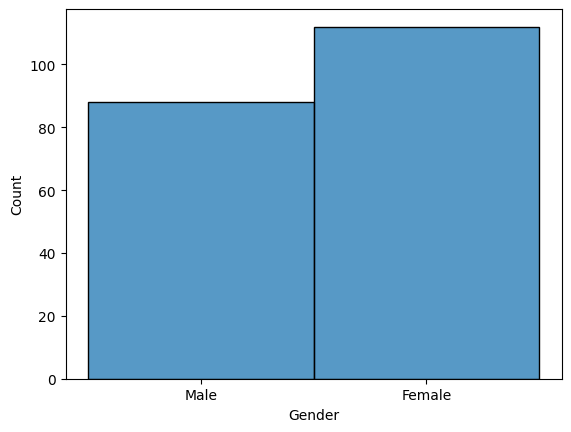

In [46]:
sns.histplot(hd['Gender'])

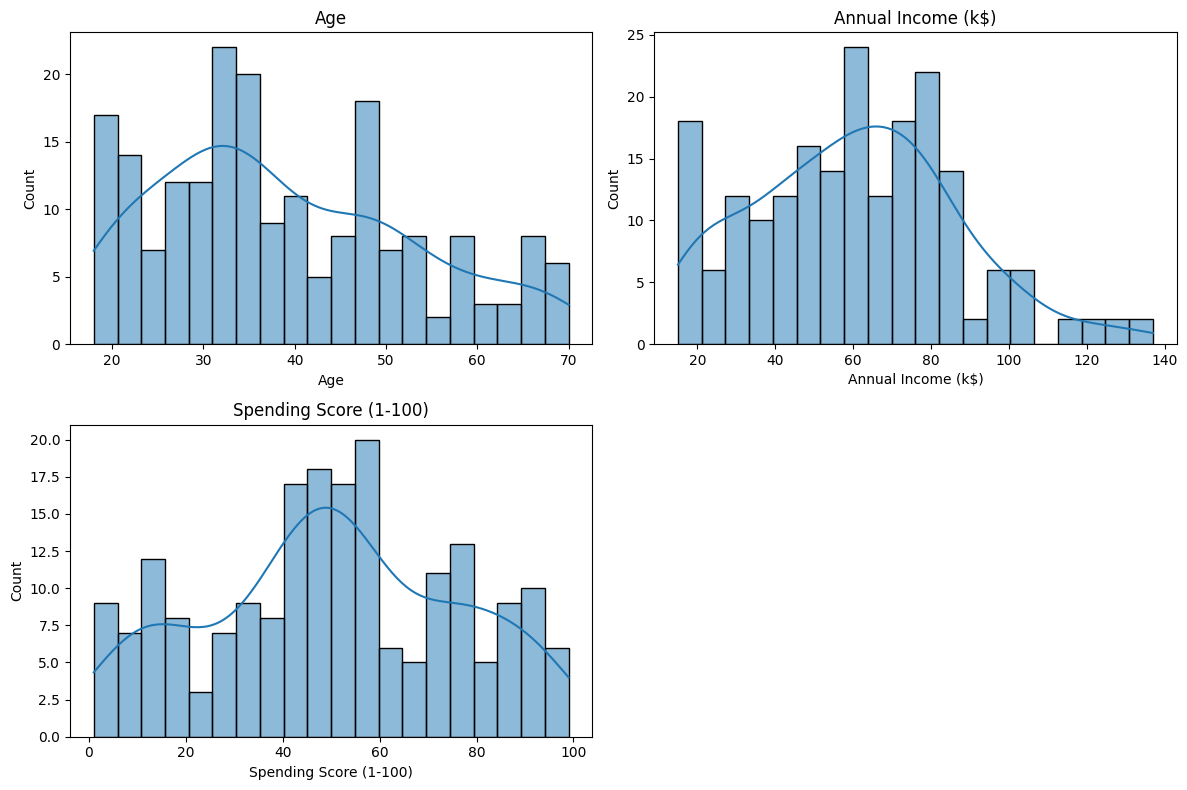

In [47]:
numeric_cols = hd.select_dtypes(include=['int64', 'float64']).columns
n = len(numeric_cols)
fig, axes = plt.subplots(nrows=(n+1)//2, ncols=2, figsize=(12, 4*((n+1)//2)))

axes = axes.flatten()
for i, col in enumerate(numeric_cols):
    sns.histplot(hd[col], bins=20, kde=True, ax=axes[i])
    axes[i].set_title(f"{col}")

# Hide extra axes if odd number
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


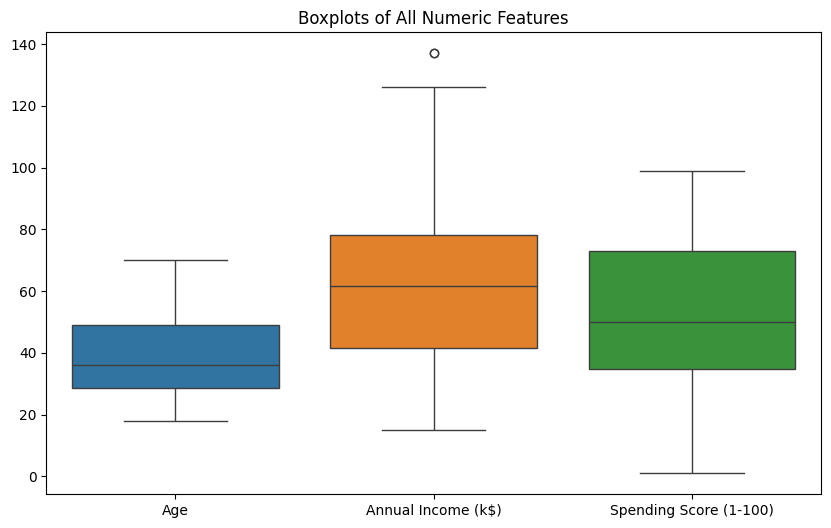

In [48]:
plt.figure(figsize=(10,6))
sns.boxplot(data=hd[numeric_cols])
plt.title("Boxplots of All Numeric Features")
plt.show()

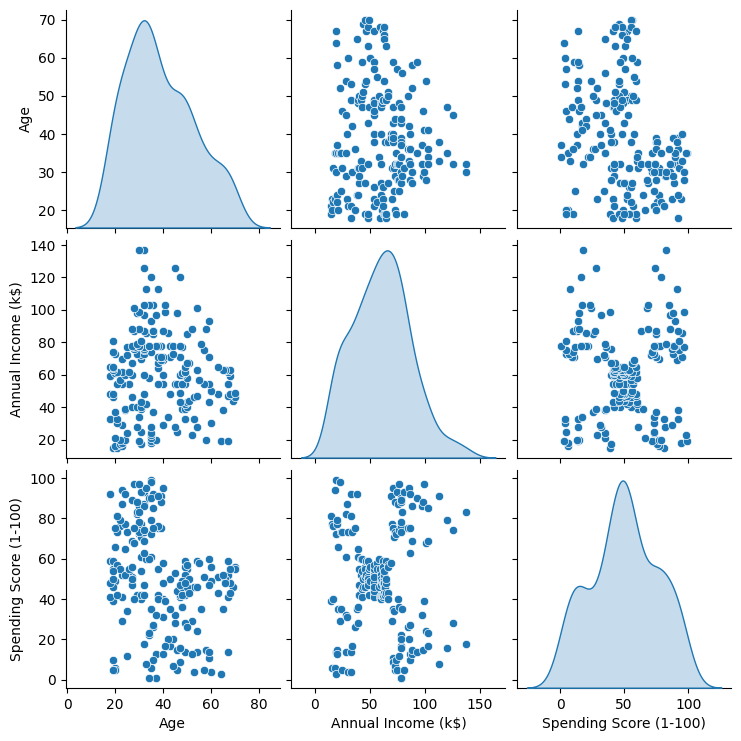

In [49]:
sns.pairplot(hd[numeric_cols], diag_kind='kde')
plt.show()

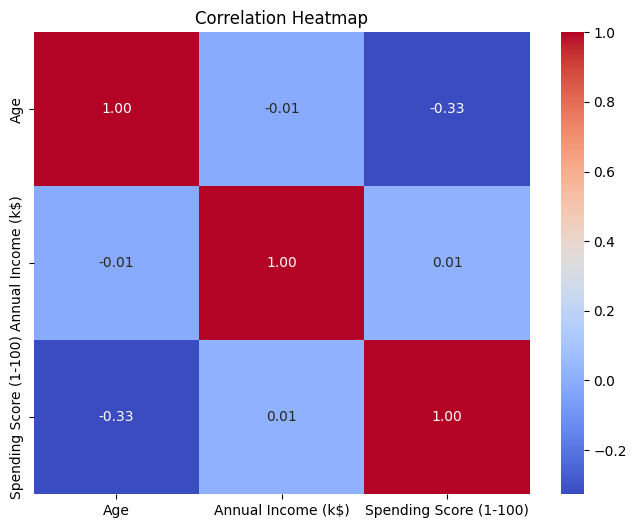

In [50]:
plt.figure(figsize=(8,6))
sns.heatmap(hd[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

#**Scaling and Encoding**

In [51]:
print(hd.columns)
hd = pd.get_dummies(hd, columns=['Gender'], drop_first=True)
print(hd.columns)

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')
Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Male'], dtype='object')


In [53]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(hd[['Annual Income (k$)', 'Spending Score (1-100)']])

#**K-Means Clustering**

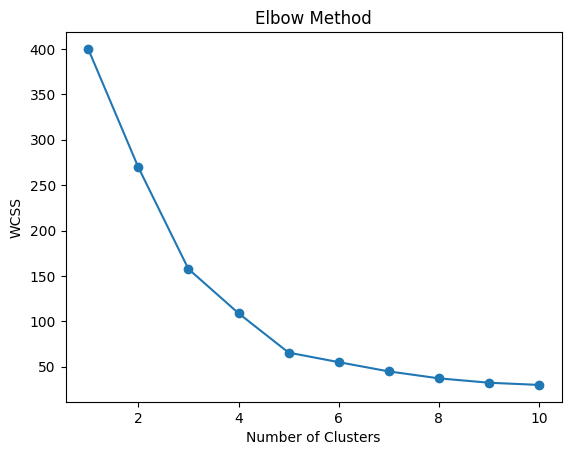

In [57]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker="o")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()




In [60]:
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_scaled)
hd['Cluster'] = labels
hd.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male,Cluster
0,19,15,39,True,4
1,21,15,81,True,2
2,20,16,6,False,4
3,23,16,77,False,2
4,31,17,40,False,4


#**Clustering Visualization**

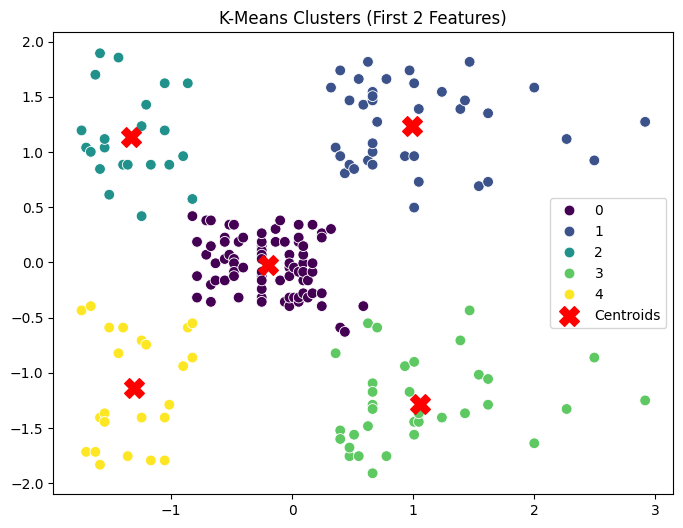

In [61]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_scaled[:,0], y=X_scaled[:,1], hue=labels, palette='viridis', s=60)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            c='red', s=200, marker='X', label='Centroids')
plt.title("K-Means Clusters (First 2 Features)")
plt.legend()
plt.show()

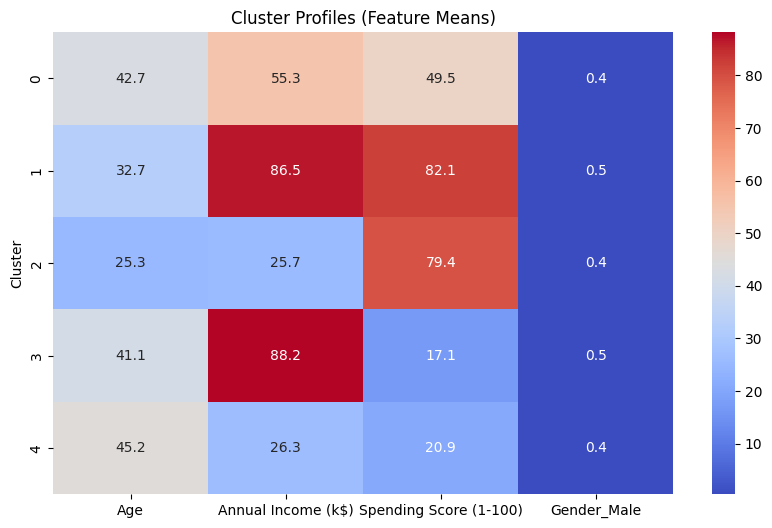

In [63]:
cluster_profile = hd.groupby('Cluster').mean()
plt.figure(figsize=(10,6))
sns.heatmap(cluster_profile, annot=True, cmap="coolwarm", fmt=".1f")
plt.title("Cluster Profiles (Feature Means)")
plt.show()
